# Setup

## Import

In [16]:
# Install Plotly to environment
!pip install plotly pandas
!pip install plotly pandas kaleido
!pip install kaleido
!pip install -U kaleido


In [17]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import kaleido
import itertools
import plotly.io as pio


## Elements

## Pastel rainbow colors
colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF", "#B4A7D6", "#D5A6BD", "#A4C2F4"
]


Canva : Size 14,6

# Strategic Overviews (Internal)

## Leverage Overview

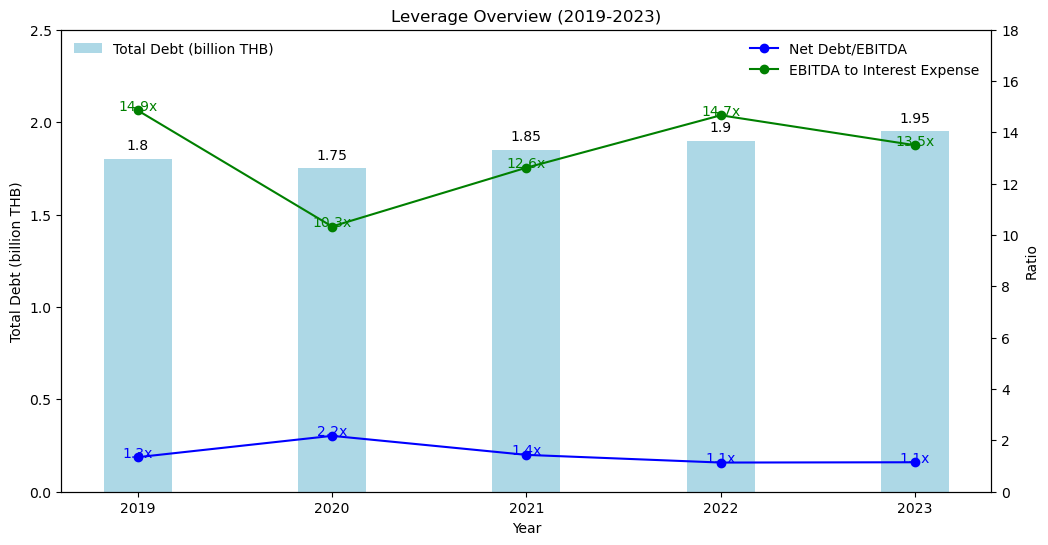

In [18]:
# Provided data
years = [2019, 2020, 2021, 2022, 2023]
total_debt = [1.80, 1.75, 1.85, 1.90, 1.95]
net_debt = [1.40, 1.35, 1.45, 1.50, 1.55]
interest_expense = [0.07, 0.06, 0.08, 0.09, 0.10]
ebitda = [1.04, 0.62, 1.01, 1.32, 1.35]

# Calculating ratios
net_debt_to_ebitda = [nd/eb for nd, eb in zip(net_debt, ebitda)]
ebitda_to_interest = [eb/ie for eb, ie in zip(ebitda, interest_expense)]

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))  # Adjusting the figure size to be 20% wider

# Bar graph for Total Debt with specified color and y-axis limit
bar_width = 0.35
ax1.bar(years, total_debt, width=bar_width, label='Total Debt (billion THB)', color='lightblue', align='center')
ax1.set_xlabel('Year', color='black')
ax1.set_ylabel('Total Debt (billion THB)', color='black')
ax1.set_ylim(0, 2.5)
ax1.tick_params(axis='y', colors='black')
ax1.tick_params(axis='x', colors='black')
ax1.legend(loc='upper left', frameon=False)

# Line graph for Net Debt/EBITDA and EBITDA to Interest Expense
ax2 = ax1.twinx()
ax2.plot(years, net_debt_to_ebitda, label='Net Debt/EBITDA', color='blue', marker='o')
ax2.plot(years, ebitda_to_interest, label='EBITDA to Interest Expense', color='green', marker='o')
ax2.set_ylim(0, 18)
ax2.set_ylabel('Ratio', color='black')
ax2.tick_params(axis='y', colors='black')
ax2.legend(loc='upper right', frameon=False)

# Adding the values on top of the bars and lines
for i in range(len(years)):
    ax1.text(years[i], total_debt[i] + 0.05, str(total_debt[i]), ha='center', color='black')
    ax2.text(years[i], net_debt_to_ebitda[i], f"{net_debt_to_ebitda[i]:.1f}x", ha='center', color='blue')
    ax2.text(years[i], ebitda_to_interest[i], f"{ebitda_to_interest[i]:.1f}x", ha='center', color='green')

plt.title('Leverage Overview (2019-2023)', color='black')
plt.show()


## Area Graph % Revenue Contribute Breakdown

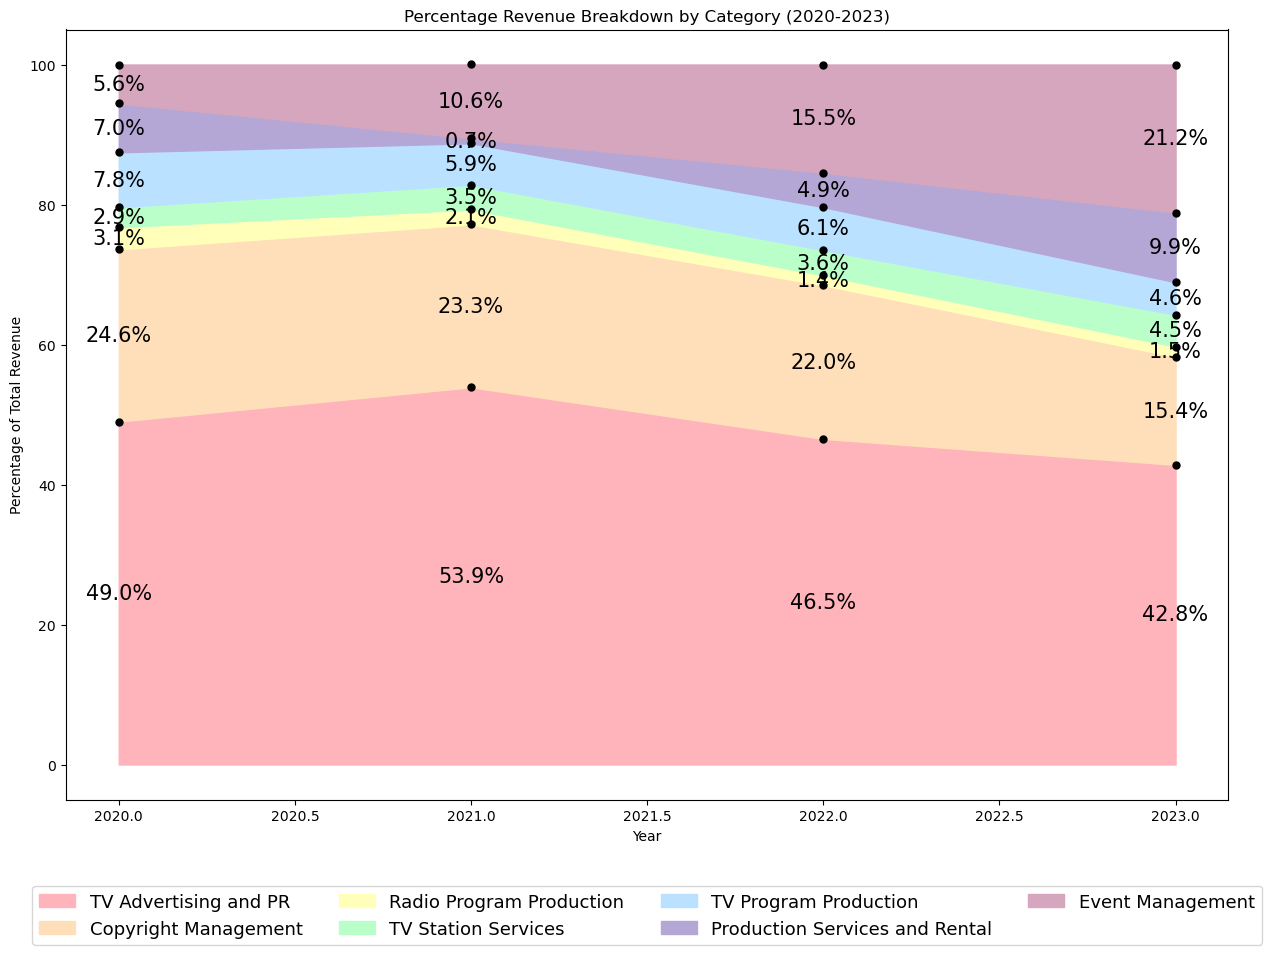

In [19]:
# Data
years = [2020, 2021, 2022, 2023]
categories = [
    'TV Advertising and PR', 'Copyright Management', 'Radio Program Production',
    'TV Station Services', 'TV Program Production', 'Production Services and Rental',
    'Event Management', 'Related Businesses'
]
data = [
    [2734.62, 2881.55, 2850.96, 2741.04],
    [1373.62, 1244.19, 1345.22, 988.49],
    [175.59, 113.96, 86.58, 93.40],
    [159.92, 188.60, 220.58, 290.75],
    [437.83, 316.80, 376.56, 297.36],
    [389.27, 37.40, 301.41, 636.53],
    [310.78, 564.30, 947.00, 1354.64],
    [0, 0, 0, 0]  # Assuming 'Related Businesses' has no revenue
]

# Convert data to percentages
data = np.array(data)
data_percentage = data / data.sum(axis=0) * 100

# Calculate cumulative percentage data for the stacked area chart
cumulative_data_percentage = np.cumsum(data_percentage, axis=0)

# Pastel rainbow colors
colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF", "#B4A7D6", "#D5A6BD", "#A4C2F4"
]

# Plotting the area chart
fig, ax = plt.subplots(figsize=(15, 10))

# Adding the areas and dots
for i, (category, color) in enumerate(zip(categories, colors)):
    if np.any(data_percentage[i]):  # Skip categories with all zeros
        if i == 0:
            ax.fill_between(years, 0, cumulative_data_percentage[i], label=category, color=color)
            ax.plot(years, cumulative_data_percentage[i], color='black', marker='o', markersize=5, linestyle='none')
        else:
            ax.fill_between(years, cumulative_data_percentage[i-1], cumulative_data_percentage[i], label=category, color=color)
            ax.plot(years, cumulative_data_percentage[i], color='black', marker='o', markersize=5, linestyle='none')

# Adding the percentage labels in the middle of their areas
for j, year in enumerate(years):
    for i, category in enumerate(categories):
        if np.any(data_percentage[i]):  # Skip categories with all zeros
            if i == 0:
                bottom = 0
            else:
                bottom = cumulative_data_percentage[i-1][j]
            top = cumulative_data_percentage[i][j]
            middle = (bottom + top) / 2
            percentage = data_percentage[i][j]
            if percentage > 0:
                ax.text(year, middle, f'{percentage:.1f}%', ha='center', va='center', fontsize=15, color='black')

# Moving the legend to the bottom in a single line

ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=int(len(categories)/2),fontsize=13)

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of Total Revenue')
ax.set_title('Percentage Revenue Breakdown by Category (2020-2023)')

plt.show()


## Business Type Own

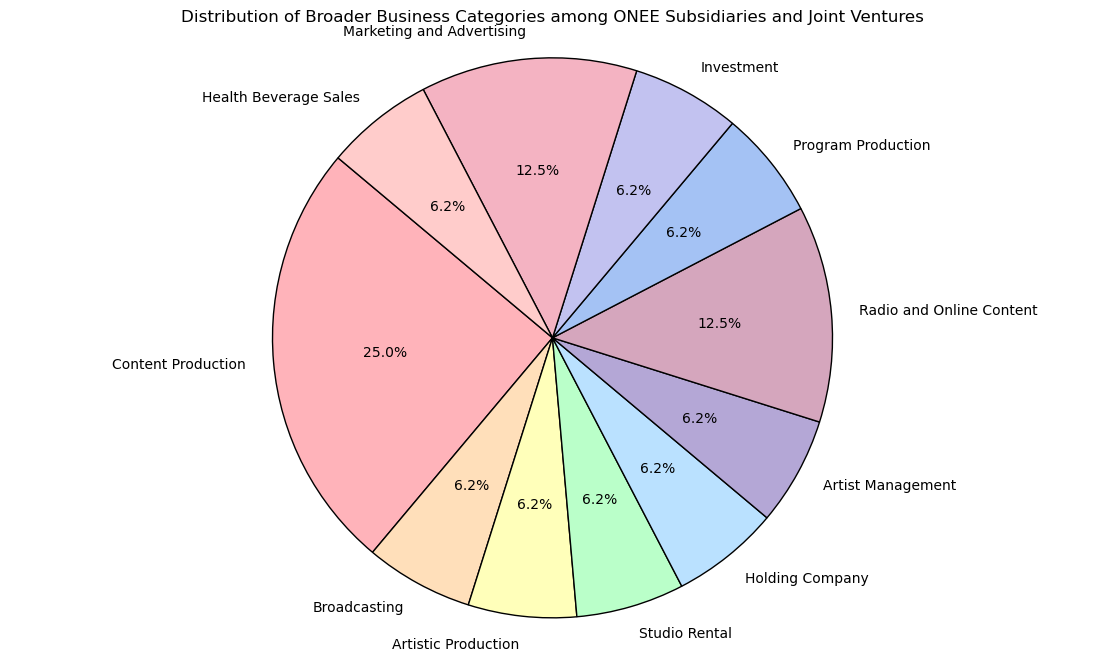

In [20]:
import matplotlib.pyplot as plt

# Data for Business Types and Functions with broader categories
broader_categories = {
    'Content Production': ['Content Production', 'Drama Series Production', 'Innovative Content Production', 'Content Creation'],
    'Broadcasting': ['Broadcasting'],
    'Artistic Production': ['Artistic Production'],
    'Studio Rental': ['Studio Rental'],
    'Holding Company': ['Holding Company'],
    'Artist Management': ['Artist Management'],
    'Radio and Online Content': ['Radio Production', 'Online Content'],
    'Program Production': ['Program Production'],
    'Investment': ['Investment'],
    'Marketing and Advertising': ['Marketing', 'Advertising'],
    'Health Beverage Sales': ['Health Beverage Sales']
}

# Create a dictionary to represent the data
# This assumes one count for each subcategory. Adjust if you have actual count data.
data = {subcategory: 1 for category in broader_categories.values() for subcategory in category}

# Count the number of subsidiaries involved in each broader category
counts = {category: sum(data.get(subcategory, 0) for subcategory in subcategories)
          for category, subcategories in broader_categories.items()}

# Data for the pie chart
labels = list(counts.keys())
sizes = list(counts.values())

# Pastel colors for the pie chart
colors = [
    "#FFB3BA", "#FFDFBA", "#FFFFBA", "#BAFFC9", "#BAE1FF", 
    "#B4A7D6", "#D5A6BD", "#A4C2F4", "#C2C2F0", "#F4B3C2",
    "#FFCCCB"
]

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(14, 8))
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding title
plt.title('Distribution of Broader Business Categories among ONEE Subsidiaries and Joint Ventures')

plt.show()

## Sankey Diagram Cost Breakdown

In [21]:
# USE THIS ONE

# Data for the Sankey diagram
data = {
    'Total Revenue': ['Revenue', 'Revenue', 'Revenue', 'Revenue', 'Revenue', 'Revenue', 'Revenue'],
    'Type of Cost': [
        'Operating Expense', 'Selling General and Administrative', 'Marketing Expense',
        'General & Administrative Expense', 'Net Financial Costs', 'Income Tax', 'Net Income'
    ],
    'Amount (THB thousands)': [
        1909472.10, 1988779.87, 428589.60, 1560190.27, 14274.69, 132080.17, 483658.40
    ],
    'Proportion (%)': [29.8, 31.0, 6.7, 24.3, 0.2, 2.1, 7.5]
}

df = pd.DataFrame(data)

# Create lists of unique sources and targets
all_nodes = list(set(df['Total Revenue'].tolist() + df['Type of Cost'].tolist()))
source_indices = [all_nodes.index(source) for source in df['Total Revenue']]
target_indices = [all_nodes.index(target) for target in df['Type of Cost']]

# Rainbow pastel colors, with light blue for Revenue
colors = ["#BAE1FF", "#A4C2F4"]

# Create an iterator that will cycle through the colors (excluding the first light blue color for Revenue)
color_cycle = itertools.cycle(colors[1:])

# Assign colors to nodes
node_colors = ["#BAE1FF" if node == "Revenue" else next(color_cycle) for node in all_nodes]

# Highlight color for Net Income
highlight_color = "#A4C2F4"

# Assign colors to links
link_colors = []
for target in df['Type of Cost']:
    if target == "Selling General and Administrative":
        link_colors.append(highlight_color)
    elif target == "Marketing Expense":
        link_colors.append(highlight_color)
    else:
        link_colors.append(node_colors[source_indices[df['Type of Cost'].tolist().index(target)]])

# Create custom labels for nodes with additional information
custom_labels = []
for node in all_nodes:
    if node in df['Type of Cost'].values:
        amount = df[df['Type of Cost'] == node]['Amount (THB thousands)'].values[0]
        proportion = df[df['Type of Cost'] == node]['Proportion (%)'].values[0]
        custom_labels.append(f"{node}<br>{amount:,.0f}M ({proportion:.1f}%)")
    else:
        custom_labels.append(node)

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=custom_labels,
        color=node_colors
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=df['Amount (THB thousands)'],
        customdata=[f"{value:,.0f}M ({prop:.1f}%)" for value, prop in zip(df['Amount (THB thousands)'], df['Proportion (%)'])],
        hovertemplate='%{customdata}<extra></extra>',
        color=link_colors
    )
)])

# Update the layout with adjustable figure size and enhanced label visibility
fig.update_layout(
    font=dict(size=15, color="black"),  # Set global font properties
    width=1000,
    height=600
)

# Show the figure
fig.show()

# Export the figure as a PNG file
pio.write_image(fig, "revenue_sankey_diagram.png", scale=2, engine="kaleido")

print("The Sankey diagram has been exported as 'revenue_sankey_diagram.png'")


The Sankey diagram has been exported as 'revenue_sankey_diagram.png'


## Compare Revenue in Thai with Other countries

In [22]:
import plotly.graph_objects as go

# Given values
global_revenue = 9500.3
thailand_revenue = 6432.2

# Calculate the portion of revenue
thailand_portion = (thailand_revenue / global_revenue) * 100
rest_of_world_portion = 100 - thailand_portion

# Data for the pie chart
labels = ['Thailand Revenue', 'Others Country Revenue']
values = [thailand_portion, rest_of_world_portion]

# # Create the pie chart
# fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', insidetextorientation='radial')])

# # Update the layout with title and adjustments
# fig.update_layout(
#     title_text="Portion of Revenue from Thailand in 2023",
#     font=dict(size=15, color="black")
# )

# # Show the figure
# fig.show()

# Pastel colors for the pie chart
colors = ['#FFB3BA', '#BAE1FF']

# Create the pie chart
fig = go.Figure(data=[go.Pie(
    labels=labels,
    values=values,
    textinfo='label+percent',
    insidetextorientation='radial',
    marker=dict(colors=colors)
)])

# Update the layout with title and adjustments
fig.update_layout(
    title_text="Portion of Revenue from Thailand in 2023",
    font=dict(size=15, color="black"),
    width=800,
    height=600
)

# Show the figure
fig.show()



# Industry Overview (External)

## Marketsize

In [23]:
# Forgot Main data called 'combine_df' should be somewhere in GPT

In [24]:
# # Adjusting colors to pastel red and blue for bars, and dark red and blue for lines

# # New color scheme
# pastel_colors = ['#89CFF0', '#FFB6C1']
# line_colors = ['#0000FF', '#FF0000']

# fig, ax = plt.subplots(figsize=(18, 8))

# # Creating the stacked bar chart
# bottom = np.zeros(len(combined_df['Year']))
# tv_bars = ax.bar(combined_df['Year'], combined_df['TV Market Size (USD Million)'], label='TV Market Size (USD Million)', color=pastel_colors[0])
# digital_bars = ax.bar(combined_df['Year'], combined_df['Digital Content Market Size (USD Million)'], bottom=combined_df['TV Market Size (USD Million)'], label='Digital Content Market Size (USD Million)', color=pastel_colors[1])

# # Adding labels for total market size
# for i, total in enumerate(combined_df['TV Market Size (USD Million)'] + combined_df['Digital Content Market Size (USD Million)']):
#     ax.text(combined_df['Year'][i], total + 2000, f'Total: {total:.1f}', ha='center', va='bottom', fontsize=14, color='black')

# # Adding line plots for TV and Digital Content Market Sizes starting from 0
# ax2 = ax.twinx()
# ax2.plot(combined_df['Year'], combined_df['TV Market Size (USD Million)'], color=line_colors[0], marker='o', linestyle='-', linewidth=2, label='TV Market Size (Line)')
# ax2.plot(combined_df['Year'], combined_df['Digital Content Market Size (USD Million)'], color=line_colors[1], marker='o', linestyle='-', linewidth=2, label='Digital Content Market Size (Line)')
# ax2.set_ylim(0, 500000)

# # Adding labels for line plots
# for i, value in enumerate(combined_df['TV Market Size (USD Million)']):
#     ax2.text(combined_df['Year'][i], value, f'{value:.1f}', ha='center', va='bottom', fontsize=10, color=line_colors[0])
# for i, value in enumerate(combined_df['Digital Content Market Size (USD Million)']):
#     ax2.text(combined_df['Year'][i], value, f'{value:.1f}', ha='center', va='top', fontsize=10, color=line_colors[1])

# # Adding percentage labels for each proportion
# for i, (tv, digital) in enumerate(zip(combined_df['TV Market Size (USD Million)'], combined_df['Digital Content Market Size (USD Million)'])):
#     total = tv + digital
#     tv_percent = (tv / total) * 100
#     digital_percent = (digital / total) * 100
    
#     # Label for TV Market Size
#     ax.text(combined_df['Year'][i], tv / 2, f'{tv_percent:.1f}%', ha='center', va='center', fontsize=16, color='black')
    
#     # Label for Digital Content Market Size
#     ax.text(combined_df['Year'][i], tv + digital / 2, f'{digital_percent:.1f}%', ha='center', va='center', fontsize=16, color='black')

# ax.set_xlabel('Year')
# ax.set_ylabel('Market Size (USD Million)')
# ax.set_title('Market Size of TV Broadcast and Digital Content (2019-2023)')
# ax.legend(loc='upper left')
# ax.grid(False)
# ax2.set_ylabel('Market Size (USD Million)')
# ax2.legend(loc='lower left')

# plt.tight_layout()
# plt.show()


## Compare CAC Before After Data-Driven

## Data-Analytic Marketsize

In [25]:
import pandas as pd

# Initial market size in 2023
initial_market_size = 38.67
# Market size by 2032
final_market_size = 393.35
# CAGR
cagr = 0.3041
# Years from 2023 to 2032
years = list(range(2023, 2033))

# Calculate market size for each year
market_sizes = [initial_market_size * (1 + cagr) ** (year - 2023) for year in years]

# Create a dataframe
market_size_df = pd.DataFrame({
    'Year': years,
    'Market Size (USD Billion)': market_sizes
})

market_size_df['Market Size (USD Billion)'] = market_size_df['Market Size (USD Billion)'].round(2)

# Data for the bar plot
years = market_size_df['Year']
market_sizes = market_size_df['Market Size (USD Billion)']



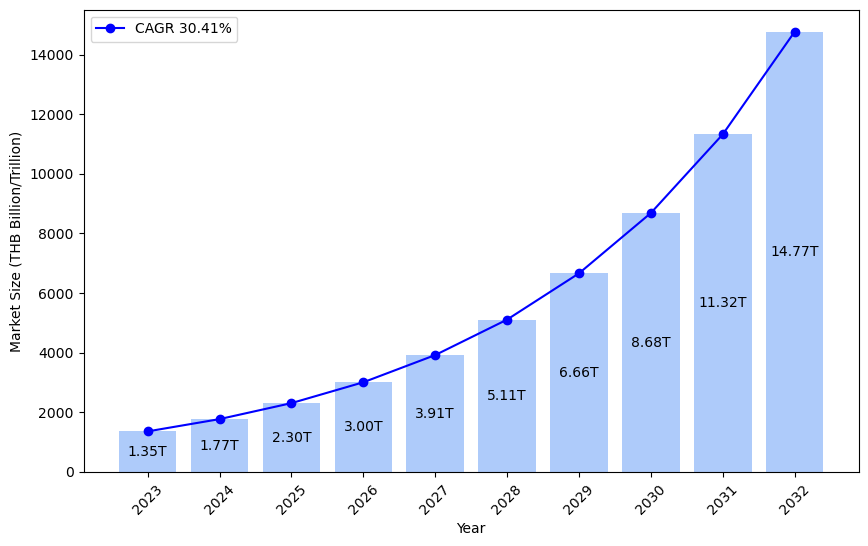

In [26]:
# Conversion rate from USD to THB (assuming 1 USD = 35 THB)
conversion_rate = 35
market_sizes_thb = market_sizes * conversion_rate

# Adjusting the labels for market sizes in THB to include 'B' for Billion and 'T' for Trillion
def format_label(value):
    if value >= 1000:
        return f'{value / 1000:.2f}T'
    else:
        return f'{value:.2f}B'

# Creating the bar plot with updated labels inside the bars and an exponential line in THB
plt.figure(figsize=(10, 6))
bars = plt.bar(years, market_sizes_thb, color='#AECBFA')  # Pastel Blue

# Adding labels inside the bars with units
for bar in bars:
    yval = bar.get_height()
    label = format_label(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval / 2, label, ha='center', va='center', color='black')

# Plotting the exponential line of CAGR
plt.plot(years, market_sizes_thb, marker='o', linestyle='-', color='blue', label='CAGR 30.41%')  # Blue

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Market Size (THB Billion/Trillion)')
# plt.title('Forecasted Market Size of Data Analytics Market (2023-2032)')
plt.xticks(years, rotation=45)
plt.legend()

# Show the plot
plt.show()


## Quality & Quantity of Content Generate 

using Data Driven tools compare with Non-Data Driven tools

## Trend Digital Content CAGR 6.1% : 13.4%

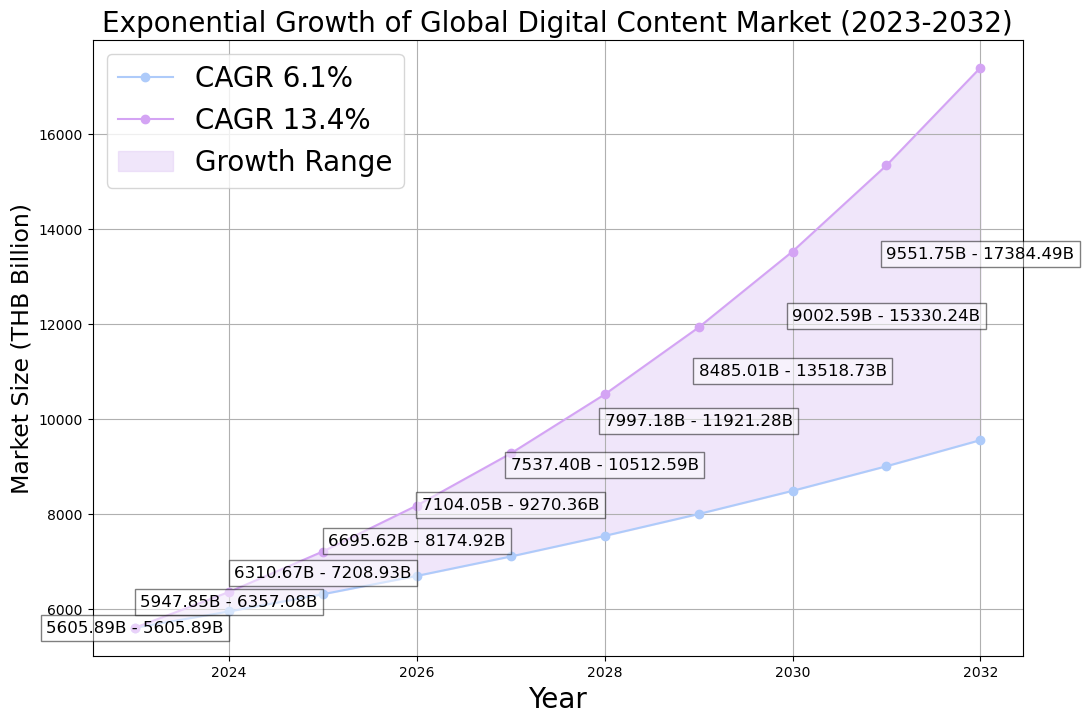

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Initial market size in 2023 (in USD billion)
initial_market_size_usd = 167.34

# Conversion rate from USD to THB
usd_to_thb = 33.5  # Assuming 1 USD = 33.5 THB

# Convert initial market size to THB
initial_market_size_thb = initial_market_size_usd * usd_to_thb

# Years from 2023 to 2032
years = np.arange(2023, 2033)
n_years = years - 2023

# CAGR values
cagr_6_1 = 0.061
cagr_13_4 = 0.134

# Calculate future values using the CAGR formula in THB
market_size_6_1_thb = initial_market_size_thb * (1 + cagr_6_1) ** n_years
market_size_13_4_thb = initial_market_size_thb * (1 + cagr_13_4) ** n_years

# Plotting the exponential growth graph in THB
plt.figure(figsize=(12, 8))
plt.plot(years, market_size_6_1_thb, marker='o', linestyle='-', color='#AECBFA', label='CAGR 6.1%')  # Pastel Blue
plt.plot(years, market_size_13_4_thb, marker='o', linestyle='-', color='#D4A4F4', label='CAGR 13.4%')  # Pastel Purple

# Highlight the area between the two lines using a light pastel color
plt.fill_between(years, market_size_6_1_thb, market_size_13_4_thb, color='#E3CEF6', alpha=0.5, label='Growth Range')  # Light Pastel Purple

# Adding labels and title
plt.xlabel('Year', fontsize=20)
plt.ylabel('Market Size (THB Billion)', fontsize=17)
plt.title('Exponential Growth of Global Digital Content Market (2023-2032)', fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)

# Adding range labels
for i in range(len(years)):
    plt.text(years[i], (market_size_6_1_thb[i] + market_size_13_4_thb[i]) / 2, 
             f'{market_size_6_1_thb[i]:.2f}B - {market_size_13_4_thb[i]:.2f}B', 
             ha='center', va='center', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Show the graph
plt.show()


In [28]:
import plotly.graph_objects as go

# Create traces for the plotly graph
trace1 = go.Scatter(
    x=years,
    y=market_size_6_1_thb,
    mode='lines+markers+text',
    name='CAGR 6.1%',
    line=dict(color='#AECBFA'),
    text=[f'{size:.2f}B' for size in market_size_6_1_thb],
    textposition='top center'
)

trace2 = go.Scatter(
    x=years,
    y=market_size_13_4_thb,
    mode='lines+markers+text',
    name='CAGR 13.4%',
    line=dict(color='#D4A4F4'),
    text=[f'{size:.2f}B' for size in market_size_13_4_thb],
    textposition='top center'
)

# Create the fill between the two lines
fill_between = go.Scatter(
    x=years.tolist() + years[::-1].tolist(),
    y=market_size_6_1_thb.tolist() + market_size_13_4_thb[::-1].tolist(),
    fill='toself',
    fillcolor='rgba(227, 206, 246, 0.5)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False
)

# Create the figure
fig = go.Figure()

# Add traces
fig.add_trace(fill_between)
fig.add_trace(trace1)
fig.add_trace(trace2)

# Update layout
fig.update_layout(
    title='Exponential Growth of Global Digital Content Market (2023-2032)',
    xaxis_title='Year',
    yaxis_title='Market Size (THB Billion)',
    width=1000,  # Adjusted figure width
    height=650,  # Adjusted figure height
    legend=dict(font=dict(size=10)),
    xaxis=dict(tickfont=dict(size=15)),
    yaxis=dict(tickfont=dict(size=15))
)

# Show the figure
fig.show()


In [29]:
import numpy as np
import plotly.graph_objects as go

# Define the years
years = np.arange(2023, 2029)

# Sample data for market sizes (replace these with your actual data)
market_size_6_1_thb = np.array([4.41, 4.75, 5.13, 5.55, 6.00, 6.48])  # Sample data for CAGR 6.1%
market_size_13_4_thb = np.array([4.41, 5.00, 5.67, 6.43, 7.28, 8.23])  # Sample data for CAGR 13.4%

# Calculate average CAGR values
avg_cagr = [(m6 + m13) / 2 for m6, m13 in zip(market_size_6_1_thb, market_size_13_4_thb)]

# Define the starting point for the bar graph
start_point = 3

# Create traces for the plotly graph
trace1 = go.Scatter(
    x=years,
    y=market_size_6_1_thb,
    mode='lines+markers+text',
    name='Lower Range (CAGR 6.1%)',
    line=dict(color='#AECBFA'),
    text=[f'{size:.2f}B' for size in market_size_6_1_thb],
    textposition='top center'
)

trace2 = go.Scatter(
    x=years,
    y=market_size_13_4_thb,
    mode='lines+markers+text',
    name='Upper Range (CAGR 13.4%)',
    line=dict(color='#D4A4F4'),
    text=[f'{size:.2f}B' for size in market_size_13_4_thb],
    textposition='top center'
)

# Create the fill between the two lines
fill_between = go.Scatter(
    x=np.concatenate([years, years[::-1]]).tolist(),
    y=np.concatenate([market_size_6_1_thb, market_size_13_4_thb[::-1]]).tolist(),
    fill='toself',
    fillcolor='rgba(227, 206, 246, 0.5)',
    line=dict(color='rgba(255,255,255,0)'),
    showlegend=False
)

# Create the bar graph for average CAGR starting from 2
trace_avg_cagr = go.Bar(
    x=years,
    y=[size - start_point for size in avg_cagr],
    base=start_point,
    name='Average CAGR',
    marker=dict(color='cornflowerblue'),  # Solid color for full opacity
    text=[f'{size:.2f}B' for size in avg_cagr],
    textposition='outside'
)

# Create the figure
fig = go.Figure()

# Add traces in the correct order
fig.add_trace(fill_between)
fig.add_trace(trace_avg_cagr)
fig.add_trace(trace1)
fig.add_trace(trace2)

# Update layout
fig.update_layout(
    title='Exponential Growth of Global Digital Content Market (2023-2029)',
    xaxis_title='Year',
    yaxis_title='Market Size (THB Billion)',
    width=1000,  # Adjusted figure width
    height=650,  # Adjusted figure height
    barmode='overlay',  # Overlay the bar graph on top of the lines
    legend=dict(font=dict(size=10)),
    xaxis=dict(tickfont=dict(size=15)),
    yaxis=dict(tickfont=dict(size=15))
)

# Show the figure
fig.show()


## Adoption Rate Curve

In [30]:
# Data
adopter_categories = ['Innovators', 'Early Adopters', 'Early Majority', 'Late Majority', 'Laggards']
percentages = [2.5, 13.5, 34, 34, 16]
cumulative_percentages = np.cumsum(percentages)

# X-axis values
x_values = np.linspace(0, 100, 1000)

# Normal distribution for adoption rate
mu, sigma = 50, 15
adoption_rate = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x_values - mu)**2 / (2 * sigma**2))

# Cumulative adoption rate (S-shaped curve)
cumulative_adoption_rate = np.cumsum(adoption_rate)
cumulative_adoption_rate = cumulative_adoption_rate / max(cumulative_adoption_rate) * 100

# Create the figure
fig = go.Figure()

# Plot adoption rate (bell-shaped curve)
fig.add_trace(go.Scatter(x=x_values, y=adoption_rate * 34 / max(adoption_rate),
                         mode='lines', name='Adoption Rate', line=dict(color='rgb(255,165,0)')))  # Orange

# Plot cumulative market share (S-shaped curve)
fig.add_trace(go.Scatter(x=x_values, y=cumulative_adoption_rate,
                         mode='lines', name='% of Data Driven Adoption', line=dict(color='#03c04a')))  # Darker green

# Highlight area under the curve until 2023
fig.add_trace(go.Scatter(x=x_values, y=np.where(x_values <= 53.5, cumulative_adoption_rate, np.nan), 
                         fill='tozeroy', mode='none', fillcolor='rgba(3,192,74,0.2)',  # Light green
                         showlegend=False))

# Add category labels as dots
category_positions = np.cumsum(percentages) - np.array(percentages) / 2
for i, (category, pos) in enumerate(zip(adopter_categories, category_positions)):
    fig.add_trace(go.Scatter(x=[pos], y=[adoption_rate[int(pos*10)] * 34 / max(adoption_rate)], 
                             mode='markers+text', text=category, textposition='bottom center', 
                             marker=dict(color='rgb(255,165,0)'), showlegend=False))  # Orange

# Add percentage labels
for i, (percentage, pos) in enumerate(zip(percentages, category_positions)):
    fig.add_trace(go.Scatter(x=[pos], y=[-10], mode='text', text=f'{percentage} %',
                             textposition='top center', showlegend=False))

# Add labels to cumulative market share line at specified percentages
labels = {12: '2020', 59.5: '2023', 75: '2028'}
for y, label in labels.items():
    x = x_values[np.abs(cumulative_adoption_rate - y).argmin()]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers+text', text=label,
                             textposition='bottom center', marker=dict(color='#03c04a'), showlegend=False, 
                             textfont=dict(size=16)))  # Darker green
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='text', text=f'{y:.1f}%', 
                             textposition='top right', textfont=dict(color='#006400', size=16), showlegend=False))  # Dark green

# Update layout
fig.update_layout(title='Diffusion of Innovations',
                  xaxis_title='Time',
                  yaxis_title='Adoption Rate (%)',
                  yaxis=dict(range=[0, 100], showgrid=False),
                  xaxis=dict(range=[0, 100], showgrid=False),
                  template='plotly_white',
                  width=1000,  # Adjusted figure width
                  height=600,  # Adjusted figure height
                  legend=dict(
                      orientation="h",
                      yanchor="bottom",
                      y=-0.3,
                      xanchor="center",
                      x=0.5
                  ))


# Show the plot
fig.show()


# Screening Criteria

## Company Radar Graph

In [14]:
import pandas as pd
import plotly.graph_objects as go

# Data
data = {
    'Big Topic': ['Size of the Target', 'Strategic Fit', 'Growth Potential', 'Management and Corporate Culture', 'Risks and Challenges'],
    'Wisesight': [9, 4.333333333, 5, 8, 6],
    'Tellscore': [8, 3, 4, 6, 5],
    'Mandala AI': [6, 3, 3.666666667, 6, 5]
}

df = pd.DataFrame(data)

# # Calculate the maximum score for each Big Topic
# max_scores = [10, 10, 10, 10, 10]

# Plotting
fig = go.Figure()

# Adding Wisesight data
fig.add_trace(go.Scatterpolar(
    r=df['Wisesight'],
    theta=df['Big Topic'],
    fill='toself',
    name='Wisesight',
    line=dict(color='#AECBFA')  # Pastel Blue
))

# Adding Tellscore data
fig.add_trace(go.Scatterpolar(
    r=df['Tellscore'],
    theta=df['Big Topic'],
    fill='toself',
    name='Tellscore',
    line=dict(color='#FF9AA2')  # Pastel Red
))

# Adding Mandala AI data
fig.add_trace(go.Scatterpolar(
    r=df['Mandala AI'],
    theta=df['Big Topic'],
    fill='toself',
    name='Mandala AI',
    line=dict(color='#D4A4F4')  # Pastel Purple
))

# Adding Maximum Score border line
# fig.add_trace(go.Scatterpolar(
#     r=max_scores,
#     theta=df['Big Topic'],
#     fill='none',
#     name='Maximum Score',
#     line=dict(color='black', dash='dash')  # Black dashed line
# ))

# Update layout
fig.update_layout(
    # title='USP Comparison of Companies',
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 10],
            tickfont=dict(size=14)  # Adjust tick font size for better readability
        ),
        angularaxis=dict(
            tickfont=dict(size=20)  # Adjust category font size for better readability
        )
    ),
    showlegend=True
)

fig.show()


## Heatmap Screening Criteria 

In [32]:
# Original score ranges for normalization
original_ranges = {
    'Affordable Price Range': 5,
    'Size Range Preferences': 5,
    'Profitability': 10,
    'Strategic Fit': 15,
    'Market Fit': 10,
    'Sustainability': 5,
    'Product/Service Fit': 10,
    'Management Team': 5,
    'Integration Complexity': 5,
    'Technological Capabilities': 10,
    'Patents and R&D': 5,
    'Vision, Mission, and Culture': 10,
    'Acquisition Feasibility': 5,
    'Consumer Demand': 5
}

# Calculate weight percentages
weight_percentages = {k: int((v / 15) * 15) for k, v in original_ranges.items()}

# Original scores
scores = {
    'Wisesight': [4, 5, 7, 14, 9, 4, 9, 4, 4, 9, 3, 9, 4, 4],
    'Tellscore': [4, 4, 5, 10, 7, 3, 7, 3, 3, 8, 3, 7, 3, 3],
    'Mandala AI': [3, 3, 4, 11, 6, 2, 7, 3, 3, 7, 3, 6, 3, 3]
}

# Normalize the scores to a 1-5 scale
normalized_scores = {}
for company, score_list in scores.items():
    normalized_scores[company] = [
        score / original_ranges[criteria] * 5 
        for score, criteria in zip(score_list, original_ranges.keys())
    ]

# Calculate sum scores for each company
sum_scores = {company: sum(score_list) for company, score_list in normalized_scores.items()}

# Update criteria names with weight percentages
criteria_with_weights = [f"{criterion} ({weight}%)" for criterion, weight in weight_percentages.items()]

# Prepare data for heatmap
normalized_scores_df = pd.DataFrame(normalized_scores, index=criteria_with_weights)

# Create heatmap using Plotly
fig_heatmap = go.Figure(data=go.Heatmap(
    z=normalized_scores_df.values,
    x=normalized_scores_df.columns,
    y=normalized_scores_df.index,
    colorscale='Blues',
    texttemplate="%{z:.2f}",
    textfont={"size":12}
))

# Add sum scores as annotations on top
annotations = []
for i, company in enumerate(normalized_scores_df.columns):
    annotations.append(dict(
        x=i, y=-1,  # Position above the heatmap
        xref='x', yref='y',
        text=f"Total: {sum_scores[company]:.2f}",
        font=dict(size=12, color='black'),
        showarrow=False
    ))

fig_heatmap.update_layout(
    title='Heatmap of Company Scoring Criteria (Normalized)',
    xaxis_title='Companies',
    yaxis_title='Criteria',
    xaxis=dict(side='top'),
    yaxis=dict(autorange='reversed'),
    annotations=annotations,
    width=960,  # Adjusted figure width
    height=800   # Adjusted figure height
)

# Show the plot
fig_heatmap.show()


## USP Graph Analysis

In [33]:
# Data for the line graph based on the provided table
# big_topics = ['Size of the Target', 'Strategic Fit', 'Growth Potential', 'Management and Corporate Culture', 'Risks and Challenges']
# wisesight_scores = [9.00, 13.17, 15.00, 8.50, 12.50]
# tellscore_scores = [8.00, 10.83, 12.00, 6.50, 10.00]
# mandala_ai_scores = [6.00, 9.17, 11.00, 6.00, 9.50]

In [13]:
import pandas as pd
import plotly.graph_objects as go

# Data
data = {
    'Big Topic': ['Size of the Target', 'Strategic Fit', 'Growth Potential', 'Management and Corporate Culture', 'Risks and Challenges'],
    'Wisesight': [9, 4.333333333, 5, 8, 6],
    'Tellscore': [8, 3, 4, 6, 5],
    'Mandala AI': [6, 3, 3.666666667, 6, 5]
}

df = pd.DataFrame(data)

# Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['Big Topic'], 
    y=df['Wisesight'], 
    mode='lines+markers', 
    name='Wisesight',
    line=dict(color='#AECBFA')  # Pastel Blue
))

fig.add_trace(go.Scatter(
    x=df['Big Topic'], 
    y=df['Tellscore'], 
    mode='lines+markers', 
    name='Tellscore',
    line=dict(color='#FF9AA2')  # Pastel Red
))

fig.add_trace(go.Scatter(
    x=df['Big Topic'], 
    y=df['Mandala AI'], 
    mode='lines+markers', 
    name='Mandala AI',
    line=dict(color='#D4A4F4')  # Pastel Purple
))

# # Adding border lines at 1 and 10
# fig.add_shape(type="line",
#               x0=-0.5, y0=1, x1=4.5, y1=1,
#               line=dict(color="LightGrey", width=2, dash="dash"))

# fig.add_shape(type="line",
#               x0=-0.5, y0=10, x1=4.5, y1=10,
#               line=dict(color="LightGrey", width=2, dash="dash"))

# Adding title and labels
fig.update_layout(
    # title='USP Comparison of Companies',
    # xaxis_title='Big Topic',
    yaxis_title='Normalized Score',
    legend_title='Company',
    plot_bgcolor='whitesmoke',  # Lighter grey background for plot
    paper_bgcolor='white',  # Overall background
    xaxis=dict(showgrid=False),  # Removing x-axis grid lines
    yaxis=dict(showgrid=False)   # Removing y-axis grid lines
)

fig.show()


# Synergy

## Impact on Revenue Synergy

Noted :
1. Add CAGR Line Within and Without line
2. Label down word 'Different' on top of percentage


### 1st Draft Bar Chart

#### Grouped With Synergy & Without Synergy

In [ ]:
# Define the years
years = np.arange(2023, 2029)

# Initial values
initial_revenue = 4.41  # B ฿
initial_synergy_revenue = 4.41 + 0.25 * (1 + 0.08)  # B ฿, including initial leverage of 8%

# Growth rate
growth_rate = 0.08

# Calculate revenues without synergies
revenue_without_synergies = [initial_revenue * ((1 + growth_rate) ** i) for i in range(len(years))]

# Calculate revenues with synergies
leverage = 0.08
revenue_with_synergies = [initial_synergy_revenue]
for i in range(1, len(years)):
    leverage -= 0.01  # Reduce leverage by 1% each year
    synergy_revenue = revenue_with_synergies[-1] * (1 + growth_rate) + 0.25 * (1 + leverage)
    revenue_with_synergies.append(synergy_revenue)

# Calculate percentage difference
percentage_diff = [
    ((revenue_with_synergies[i] - revenue_without_synergies[i]) / revenue_without_synergies[i]) * 100
    for i in range(len(years))
]

# Create the bar graph with Plotly
fig = go.Figure()

# Add bars for 'Without Synergies'
fig.add_trace(go.Bar(
    x=years,
    y=revenue_without_synergies,
    name='Without Synergies',
    text=[f'{rev:.2f}B ฿' for rev in revenue_without_synergies],
    textposition='outside',
    marker_color='skyblue'
))

# Add bars for 'With Synergies'
fig.add_trace(go.Bar(
    x=years,
    y=revenue_with_synergies,
    name='With Synergies',
    text=[f'{rev:.2f}B ฿' for rev in revenue_with_synergies],
    textposition='outside',
    marker_color='lightcoral'
))

# Add annotations for percentage difference
for i, year in enumerate(years):
    fig.add_annotation(
        x=year,
        y=max(revenue_without_synergies[i], revenue_with_synergies[i]) + 1.5,
        text=f'{percentage_diff[i]:.2f}%',
        showarrow=False,
        font=dict(size=20, color='black')
    )

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Revenue (B ฿)',
    barmode='group',
    width=1200,
    height=1000,
    xaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    yaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        font=dict(size=16)
    )
)

# Show the plot
fig.show()


### Stacked Bar Chart 

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define the years
years = np.arange(2023, 2029)

# Initial values
initial_revenue = 4.41  # B ฿
initial_synergy_revenue = 4.41 + 0.25 * (1 + 0.08)  # B ฿, including initial leverage of 8%

# Growth rate
growth_rate = 0.08

# Calculate revenues without synergies
revenue_without_synergies = [initial_revenue * ((1 + growth_rate) ** i) for i in range(len(years))]

# Calculate revenues with synergies
leverage = 0.08
revenue_with_synergies = [initial_synergy_revenue]
for i in range(1, len(years)):
    leverage -= 0.01  # Reduce leverage by 1% each year
    synergy_revenue = revenue_with_synergies[-1] * (1 + growth_rate) + 0.25 * (1 + leverage)
    revenue_with_synergies.append(synergy_revenue)

# Calculate percentage difference
percentage_diff = [
    ((revenue_with_synergies[i] - revenue_without_synergies[i]) / revenue_without_synergies[i]) * 100
    for i in range(len(years))
]

# Profit rate
profit_rate = 0.078

# Calculate profits
profit_without_synergies = [rev * profit_rate for rev in revenue_without_synergies]
profit_with_synergies = [rev * profit_rate for rev in revenue_with_synergies]

# Calculate adjusted revenues (revenue minus profit)
adjusted_revenue_without_synergies = [rev - profit for rev, profit in zip(revenue_without_synergies, profit_without_synergies)]
adjusted_revenue_with_synergies = [rev - profit for rev, profit in zip(revenue_with_synergies, profit_with_synergies)]

# Create the bar graph with Plotly
fig = go.Figure()

# Generate x-axis labels alternating between "Without" and "With" for each year
x_labels = []
for year in years:
    x_labels.extend([f'{year} Without', f'{year} With'])

# Add bars for 'Without Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=profit_without_synergies,
    name='Without Synergies - Profit',
    marker_color='dodgerblue',
    text=[f'{profit:.2f}B ฿' for profit in profit_without_synergies],
    textposition='inside'
))

# Add bars for 'Without Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=adjusted_revenue_without_synergies,
    name='Without Synergies - Revenue',
    marker_color='skyblue'
))

# Add bars for 'With Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=profit_with_synergies,
    name='With Synergies - Profit',
    marker_color='red',
    text=[f'{profit:.2f}B ฿' for profit in profit_with_synergies],
    textposition='inside'
))

# Add bars for 'With Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=adjusted_revenue_with_synergies,
    name='With Synergies - Revenue',
    marker_color='lightcoral'
))

# Add annotations for percentage difference
for i, year in enumerate(years):
    fig.add_annotation(
        x=f'{year} With',
        y=max(revenue_without_synergies[i], revenue_with_synergies[i]) + 1.5,
        text=f'{percentage_diff[i]:.2f}%',
        showarrow=False,
        font=dict(size=20, color='black')
    )

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Revenue (B ฿)',
    barmode='stack',  # Stacked bar mode
    width=1200,
    height=1000,
    xaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=16),
        categoryorder='array',
        categoryarray=x_labels  # Ensure correct ordering by year
    ),
    yaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        font=dict(size=16)
    )
)

# Show the plot
fig.show()


### Logic Editing

#### Adjust Profit Proportion %

In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define the years
years = np.arange(2023, 2029)

# Initial values
initial_revenue = 4.41  # B ฿
initial_synergy_revenue = 4.41 + 0.25 * (1 + 0.08)  # B ฿, including initial leverage of 8%

# Growth rate
growth_rate = 0.08

# Calculate revenues without synergies
revenue_without_synergies = [initial_revenue * ((1 + growth_rate) ** i) for i in range(len(years))]

# Calculate revenues with synergies
leverage = 0.08
revenue_with_synergies = [initial_synergy_revenue]
for i in range(1, len(years)):
    leverage -= 0.01  # Reduce leverage by 1% each year
    synergy_revenue = revenue_with_synergies[-1] * (1 + growth_rate) + 0.25 * (1 + leverage)
    revenue_with_synergies.append(synergy_revenue)

# Calculate percentage difference
percentage_diff = [
    ((revenue_with_synergies[i] - revenue_without_synergies[i]) / revenue_without_synergies[i]) * 100
    for i in range(len(years))
]

# Profit rates
profit_rate_without_synergies = 0.078
profit_rate_with_synergies = [0.1057, 0.1241, 0.1425, 0.1518, 0.1610, 0.1702]

# Calculate profits
profit_without_synergies = [rev * profit_rate_without_synergies for rev in revenue_without_synergies]
profit_with_synergies = [rev * rate for rev, rate in zip(revenue_with_synergies, profit_rate_with_synergies)]

# Calculate adjusted revenues (revenue minus profit)
adjusted_revenue_without_synergies = [rev - profit for rev, profit in zip(revenue_without_synergies, profit_without_synergies)]
adjusted_revenue_with_synergies = [rev - profit for rev, profit in zip(revenue_with_synergies, profit_with_synergies)]

# Create the bar graph with Plotly
fig = go.Figure()

# Generate x-axis labels alternating between "Without" and "With" for each year
x_labels = []
for year in years:
    x_labels.extend([f'{year} Without', f'{year} With'])

# Add bars for 'Without Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=profit_without_synergies,
    name='Without Synergies - Profit',
    marker_color='dodgerblue',
    text=[f'{profit:.2f}B ฿' for profit in profit_without_synergies],
    textposition='inside'
))

# Add bars for 'Without Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=adjusted_revenue_without_synergies,
    name='Without Synergies - Revenue',
    marker_color='skyblue'
))

# Add bars for 'With Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=profit_with_synergies,
    name='With Synergies - Profit',
    marker_color='red',
    text=[f'{profit:.2f}B ฿' for profit in profit_with_synergies],
    textposition='inside'
))

# Add bars for 'With Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=adjusted_revenue_with_synergies,
    name='With Synergies - Revenue',
    marker_color='lightcoral'
))

# Add annotations for percentage difference
for i, year in enumerate(years):
    fig.add_annotation(
        x=f'{year} With',
        y=max(revenue_without_synergies[i], revenue_with_synergies[i]) + 1.5,
        text=f'{percentage_diff[i]:.2f}%',
        showarrow=False,
        font=dict(size=20, color='black')
    )

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Revenue (B ฿)',
    barmode='stack',  # Stacked bar mode
    width=1200,
    height=1000,
    xaxis=dict(
        title_font=dict(size=18),
        tickfont=dict(size=16),
        categoryorder='array',
        categoryarray=x_labels  # Ensure correct ordering by year
    ),
    yaxis=dict(title_font=dict(size=18), tickfont=dict(size=16)),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        font=dict(size=16)
    )
)

# Show the plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go

# Define the years
years = np.arange(2023, 2029)

# Initial values
initial_revenue = 4.41  # B ฿
initial_synergy_revenue = 4.41 + 0.25 * (1 + 0.08)  # B ฿, including initial leverage of 8%

# Growth rate
growth_rate = 0.08

# Calculate revenues without synergies
revenue_without_synergies = [initial_revenue * ((1 + growth_rate) ** i) for i in range(len(years))]

# Calculate revenues with synergies
leverage = 0.08
revenue_with_synergies = [initial_synergy_revenue]
for i in range(1, len(years)):
    leverage -= 0.01  # Reduce leverage by 1% each year
    synergy_revenue = revenue_with_synergies[-1] * (1 + growth_rate) + 0.25 * (1 + leverage)
    revenue_with_synergies.append(synergy_revenue)

# Calculate percentage difference
percentage_diff = [
    ((revenue_with_synergies[i] - revenue_without_synergies[i]) / revenue_without_synergies[i]) * 100
    for i in range(len(years))
]

# Profit rates
profit_rate_without_synergies = 0.078
profit_rate_with_synergies = [0.1057, 0.1241, 0.1425, 0.1518, 0.1610, 0.1702]

# Calculate profits
profit_without_synergies = [rev * profit_rate_without_synergies for rev in revenue_without_synergies]
profit_with_synergies = [rev * rate for rev, rate in zip(revenue_with_synergies, profit_rate_with_synergies)]

# Calculate adjusted revenues (revenue minus profit)
adjusted_revenue_without_synergies = [rev - profit for rev, profit in zip(revenue_without_synergies, profit_without_synergies)]
adjusted_revenue_with_synergies = [rev - profit for rev, profit in zip(revenue_with_synergies, profit_with_synergies)]

# Create the bar graph with Plotly
fig = go.Figure()

# Generate x-axis labels alternating between "Without" and "With" for each year
x_labels = []
for year in years:
    x_labels.extend([f'{year} Without', f'{year} With'])

# Add bars for 'Without Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=profit_without_synergies,
    name='Without Synergies - Profit',
    marker_color='lightgrey',
    text=[f'{profit:.2f}B ฿' for profit in profit_without_synergies],
    textposition='inside',
    insidetextfont=dict(color='black')
))

# Add bars for 'Without Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} Without' for year in years],
    y=adjusted_revenue_without_synergies,
    name='Without Synergies - Revenue',
    marker_color='skyblue',
    text=[f'{rev:.2f}B ฿' for rev in adjusted_revenue_without_synergies],
    textposition='inside',
    insidetextfont=dict(color='black')
))

# Add bars for 'With Synergies' (Profit)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=profit_with_synergies,
    name='With Synergies - Profit',
    marker_color='lightgrey',
    text=[f'{profit:.2f}B ฿' for profit in profit_with_synergies],
    textposition='inside',
    insidetextfont=dict(color='black')
))

# Add bars for 'With Synergies' (Adjusted Revenue)
fig.add_trace(go.Bar(
    x=[f'{year} With' for year in years],
    y=adjusted_revenue_with_synergies,
    name='With Synergies - Revenue',
    marker_color='lightcoral',
    text=[f'{rev:.2f}B ฿' for rev in adjusted_revenue_with_synergies],
    textposition='inside',
    insidetextfont=dict(color='black')
))

# Add annotations for percentage difference
for i, year in enumerate(years):
    fig.add_annotation(
        x=f'{year} With',
        y=max(revenue_without_synergies[i], revenue_with_synergies[i]) + 1.5,
        text=f'{percentage_diff[i]:.2f}%',
        showarrow=False,
        font=dict(size=20, color='black')
    )

# Update layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Revenue (B ฿)',
    barmode='stack',  # Stacked bar mode
    width=1200,
    height=1000,
    xaxis=dict(
        title_font=dict(size=18, color='black'),
        tickfont=dict(size=16, color='black'),
        tickvals=[f'{year} Without' for year in years] + [f'{year} With' for year in years],
        ticktext=[str(year) for year in years] * 2,  # Use each year twice
        tickangle=0,
        categoryorder='array',
        categoryarray=x_labels  # Ensure correct ordering by year
    ),
    yaxis=dict(title_font=dict(size=18, color='black'), tickfont=dict(size=16, color='black')),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=-0.2,
        xanchor="center",
        x=0.5,
        font=dict(size=16, color='black')
    ),
    plot_bgcolor='white'
)

# Show the plot
fig.show()


## Cost Saving Synergy

In [ ]:
# Correct the lengths of the arrays in original_costs dictionary
original_costs = {
    "Type of Cost": [
        "Cost of Sales and Services",
        "Selling and Servicing Expenses",
        "Administrative Expenses",
        "Marketing",
        "Salary",
        "Production",
        "Rent",
        "Net Financial Costs",
        "Income Tax"
    ],
    "Current Amount (THB mn)": [
        3911.6,
        401.0,
        1561.7,
        178.5,
        1131.9,
        1300.0,
        300.0,
        11.2,
        142.8
    ]
}

# Create DataFrame
cost_save_df = pd.DataFrame(original_costs)

# Apply 10% reduction to costs that can be reduced
cost_save_df["New Amount (THB mn)"] = cost_save_df["Current Amount (THB mn)"]
costs_that_can_be_reduced = [
    "Cost of Sales and Services",
    "Selling and Servicing Expenses",
    "Administrative Expenses",
    "Marketing",
    "Salary",
    "Production"
]

cost_save_df.loc[cost_save_df["Type of Cost"].isin(costs_that_can_be_reduced), "New Amount (THB mn)"] *= 0.9

cost_save_df


,Type of Cost,Current Amount (THB mn),New Amount (THB mn)
0,Cost of Sales and Services,3911.6,3520.44
1,Selling and Servicing Expenses,401.0,360.90
2,Administrative Expenses,1561.7,1405.53
3,Marketing,178.5,160.65
4,Salary,1131.9,1018.71
5,Production,1300.0,1170.00
6,Rent,300.0,300.00
7,Net Financial Costs,11.2,11.20
8,Income Tax,142.8,142.80


##  Strategic Alignment



In [ ]:
import plotly.graph_objects as go

# Define product features
product_features = {
    "ZOCIAL EYE": ["Data Collection", "Sentiment Analysis", "Real-time Reports"],
    "WARROOM": ["Team Collaboration", "Engagement Tracking", "Crisis Management"],
    "COMMAND CENTER": ["Real-time Data Display", "Custom Dashboards", "Alert Systems"],
    "RESEARCH": ["Deep Dive Analysis", "Market Research", "Consumer Insights"],
    "DATA CONSULTING": ["Data Strategy", "Custom Solutions", "Expert Advice"],
    "CHATBOT SERVICE": ["AI Integration", "Customer Interaction", "Efficiency Boost"],
    "MONITORING": ["Pro-level Monitoring", "Comprehensive Coverage", "Detailed Reports"],
    "SOCIAL RESPONSE SERVICE": ["Professional Responses", "Customer Engagement", "24/7 Support"],
    "TREND": ["Trend Analysis", "Real-time Updates", "Market Predictions"],
    "REPORT": ["Benchmarking", "Performance Reports", "Custom Metrics"],
    "INFLUENCER PORTFOLIO": ["Portfolio Creation", "Performance Tracking", "Client Showcases"],
    "ONLINE PR CALCULATOR": ["Campaign Measurement", "Impact Analysis", "3-step Process"]
}

# Define business types
business_type_features = {
    "Copyright Management Business": [],
    "International Copyright Sales Business": [],
    "Media Production and Management Business": [],
    "Radio Production Business": [],
    "Event Business": [],
    "Artist Management Business": [],
    "Merchandising Business": [],
    "Studio Rental Business": []
}

# Define companies and their business types
companies = {
    "ONE31": ["Copyright Management Business", "International Copyright Sales Business"],
    "Exact Scenario": ["Artist Management Business"],
    "ACTS": ["Studio Rental Business"],
    "GMMCH": [],
    "GMMTV": ["Media Production and Management Business"],
    "GMM Media": ["Radio Production Business"],
    "Change2561": ["Event Business"],
    "GMM Studios": ["Media Production and Management Business"],
    "A Time Media": ["Radio Production Business"],
    "ONE Sanook": [],
    "Parbdee Tawesuk Company Limited": ["Media Production and Management Business"],
    "Memiti Company Limited": ["Media Production and Management Business"],
    "Good Things Happen": ["Merchandising Business"],
    "PEN 1 F&B Company Limited": [],
    "TIFA Studios": ["Media Production and Management Business"],
    "Joint Venture Congratulations My Ex": ["Event Business"]
}

# Create mappings from product features to business types
product_to_business = {
    "ZOCIAL EYE": ["Copyright Management Business", "International Copyright Sales Business", "Merchandising Business"],
    "WARROOM": ["Media Production and Management Business", "Event Business", "Artist Management Business"],
    "COMMAND CENTER": ["Media Production and Management Business", "Studio Rental Business", "Radio Production Business"],
    "RESEARCH": ["Media Production and Management Business", "International Copyright Sales Business", "Event Business"],
    "DATA CONSULTING": ["Copyright Management Business", "Media Production and Management Business", "Event Business"],
    "CHATBOT SERVICE": ["Artist Management Business", "Event Business"],
    "MONITORING": ["Media Production and Management Business", "Radio Production Business", "Event Business"],
    "SOCIAL RESPONSE SERVICE": ["Artist Management Business", "Event Business"],
    "TREND": ["Media Production and Management Business", "Merchandising Business", "Radio Production Business"],
    "REPORT": ["International Copyright Sales Business", "Media Production and Management Business", "Merchandising Business"],
    "INFLUENCER PORTFOLIO": ["Artist Management Business", "Merchandising Business", "Event Business"],
    "ONLINE PR CALCULATOR": ["Event Business", "Media Production and Management Business", "Merchandising Business"]
}

# Create the nodes list
nodes = list(product_features.keys()) + list(business_type_features.keys()) + list(companies.keys())

# Create a mapping from node name to index
node_indices = {node: index for index, node in enumerate(nodes)}

# Define the links
links = {
    'source': [],
    'target': [],
    'value': []
}

# Add links from product features to business types
for product, business_types in product_to_business.items():
    for business in business_types:
        links['source'].append(node_indices[product])
        links['target'].append(node_indices[business])
        links['value'].append(10)  # Assign an arbitrary value

# Add links from business types to companies
for company, business_types in companies.items():
    for business in business_types:
        links['source'].append(node_indices[business])
        links['target'].append(node_indices[company])
        links['value'].append(10)  # Assign an arbitrary value

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=links['source'],
        target=links['target'],
        value=links['value']
    )
))

# Adjust the layout size
fig.update_layout(
    title_text="Product Features to Business Types to Companies",
    font_size=18,
    width=1200,
    height=800
)

fig.show()
